<ipython-input-3-4e195dc2e904>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem( np.arange( 0, cuantos_chupetines ), xn[ 0 : cuantos_chupetines ], use_line_collection = True )


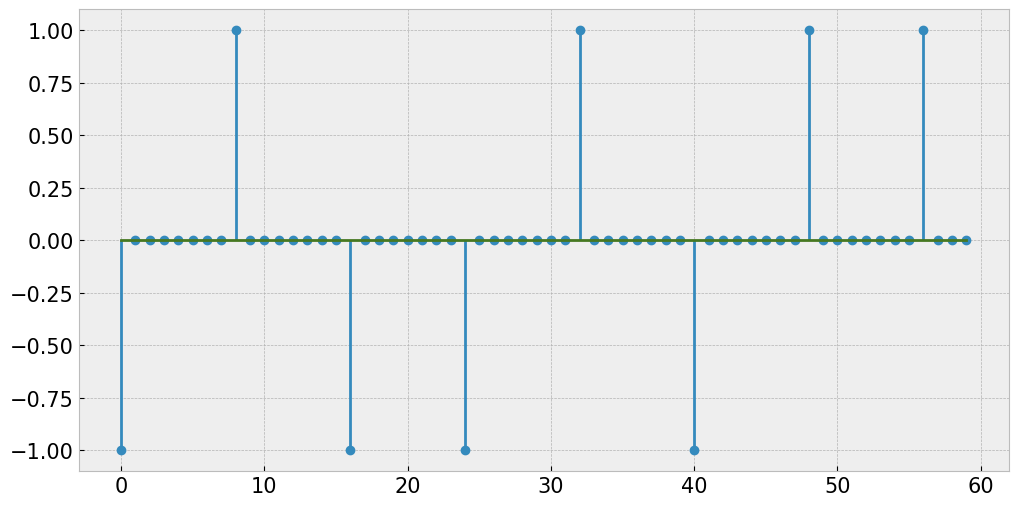

In [ ]:
xn = np.zeros( cantidad_simbolos * M )

for i in range( cantidad_simbolos ) :
    xn[ i * M ] = simbolos_PAM2[ i ]

params = { 'legend.fontsize': 'large',
           'figure.figsize': ( 12, 6 ),
           'axes.labelsize': 20,
           'axes.titlesize': 20,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'axes.titlepad': 30 }
plt.rcParams.update( params )

fig, ax = plt.subplots()

cuantos_chupetines = 60
ax.stem( np.arange( 0, cuantos_chupetines ), xn[ 0 : cuantos_chupetines ], use_line_collection = True )

plt.show()


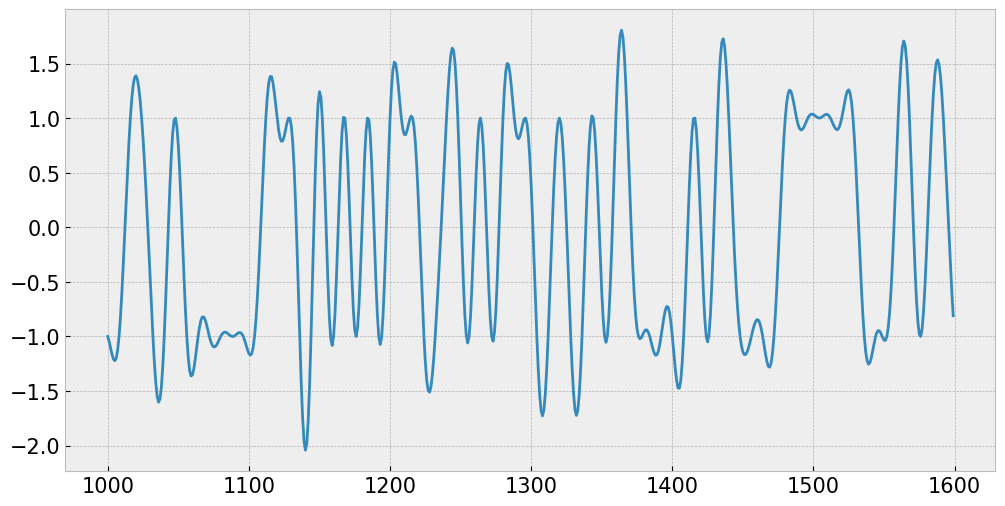

In [ ]:
from scipy.signal import convolve

sn = convolve( xn, gn )

fig, ax = plt.subplots()

cuantos_chupetines = 1600
ax.plot( np.arange( 1000, cuantos_chupetines ), sn[ 1000 : cuantos_chupetines ] )
# ax.stem( np.arange( 1000, cuantos_chupetines ), sn[ 1000 : cuantos_chupetines ] )

plt.show()


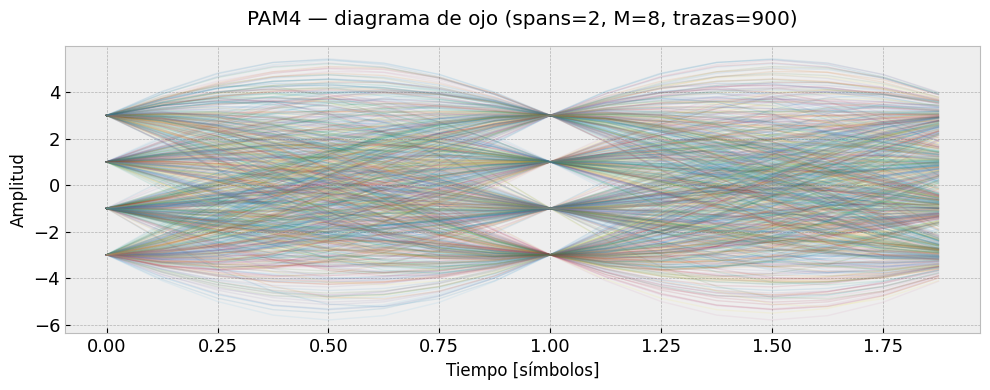

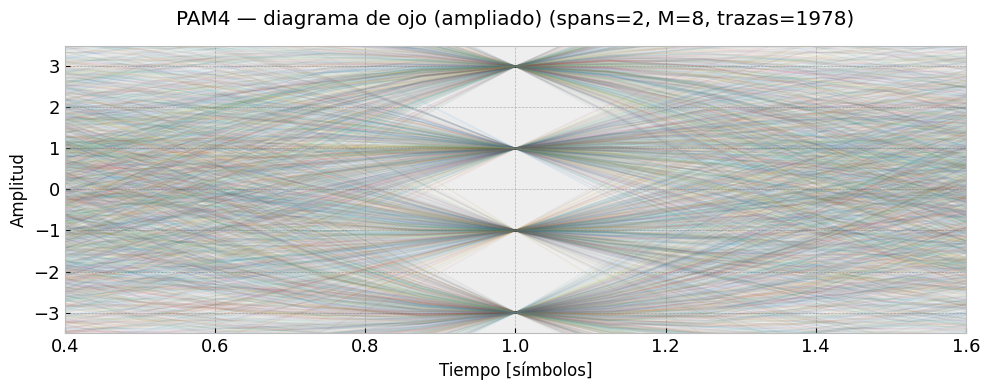

In [3]:
# ==============================================
# PAM4: diagrama de ojo (normal y ampliado)
# Compatible con Google Colab (Matplotlib 3.8+)
# ==============================================
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

# -------- Parámetros ----------
fB = 32e9          # baudios
T  = 1 / fB
M  = 8             # sobremuestreo (muestras/símbolo)
alpha = 0.1        # roll-off
L = 20             # longitud del pulso (+/- L símbolos)
Nsym = 2000        # símbolos PAM4

# -------- Raised-cosine g[n] ----------
t = np.arange(-L, L + 1/M, 1/M) * T
x = t / T
gn = np.zeros_like(t, dtype=float)
num = np.sinc(x) * np.cos(np.pi * alpha * x)
den = 1 - (2*alpha*x)**2
ok = np.abs(den) > 1e-12
gn[ok] = num[ok] / den[ok]
sing = np.isclose(np.abs(x), 1/(2*alpha), atol=1e-12)
gn[sing] = (np.pi/4.0) * np.sinc(1/(2*alpha))
gn /= np.max(gn)   # normalizo

# -------- Señal PAM4 y transmisión ----------
levels = np.array([-3, -1, +1, +3], dtype=float)
rng = np.random.default_rng(123)
symbols = levels[rng.integers(0, 4, size=Nsym)]

xn = np.zeros(Nsym * M)
xn[0::M] = symbols                       # “secuencia extendida”
yn = np.convolve(xn, gn, mode="same")    # señal transmitida

# -------- Función de diagrama de ojo ----------
def eye_diagram(y, M, spans=2, start_sym=L, ntraces=1000, alpha_lines=0.08,
                xlim=None, ylim=None, title="Diagrama de ojo"):
    seg = spans * M
    start = start_sym * M
    idxs = np.arange(start, len(y) - seg, M)
    n = min(ntraces, len(idxs))
    x_eye = np.linspace(0, spans, seg, endpoint=False)

    plt.figure(figsize=(10, 4))
    for k in range(n):
        i = idxs[k]
        plt.plot(x_eye, y[i:i+seg], lw=1.0, alpha=alpha_lines)
    plt.grid(True); plt.xlabel("Tiempo [símbolos]"); plt.ylabel("Amplitud")
    plt.title(f"{title} (spans={spans}, M={M}, trazas={n})")
    if xlim: plt.xlim(*xlim)
    if ylim: plt.ylim(*ylim)
    plt.tight_layout(); plt.show()

# -------- (1) Ojo PAM4 “normal” --------
eye_diagram(yn, M, spans=2, ntraces=900, alpha_lines=0.10,
            title="PAM4 — diagrama de ojo")

# -------- (2) Ojo PAM4 “ampliado” (zoom/denso) --------
eye_diagram(yn, M, spans=2, ntraces=2000, alpha_lines=0.05,
            xlim=(0.4, 1.6), ylim=(-3.5, 3.5),
            title="PAM4 — diagrama de ojo (ampliado)")
